## Face & Facial Landmark Detection

In this notebook has showed how detect a face using dlib and perform facial detection

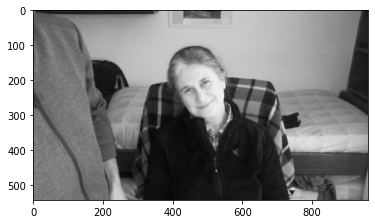

In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

sample = cv2.cvtColor(cv2.imread('resources/sample.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(sample, cmap='gray')
plt.show()

DLib uses HOG and SVM in order to search in the image, it computes over a sliding window HOG and then uses SVM classifier in order to find if is contained a face in the current window. 

After that face has been detected we want to extract facial landmarks. This can be done with the implementation of dlib of 'One Millisecond Face Alignment with an Ensemble of Regression Trees'. Specifically are extracted 5 points as specified by https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/ with a dlib pretrained model.

/home/andreaconti/Scrivania/face_recognition_cam/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/andreaconti/Scrivania/face_recognition_cam/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/andreaconti/Scrivania/face_recognition_cam/.venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

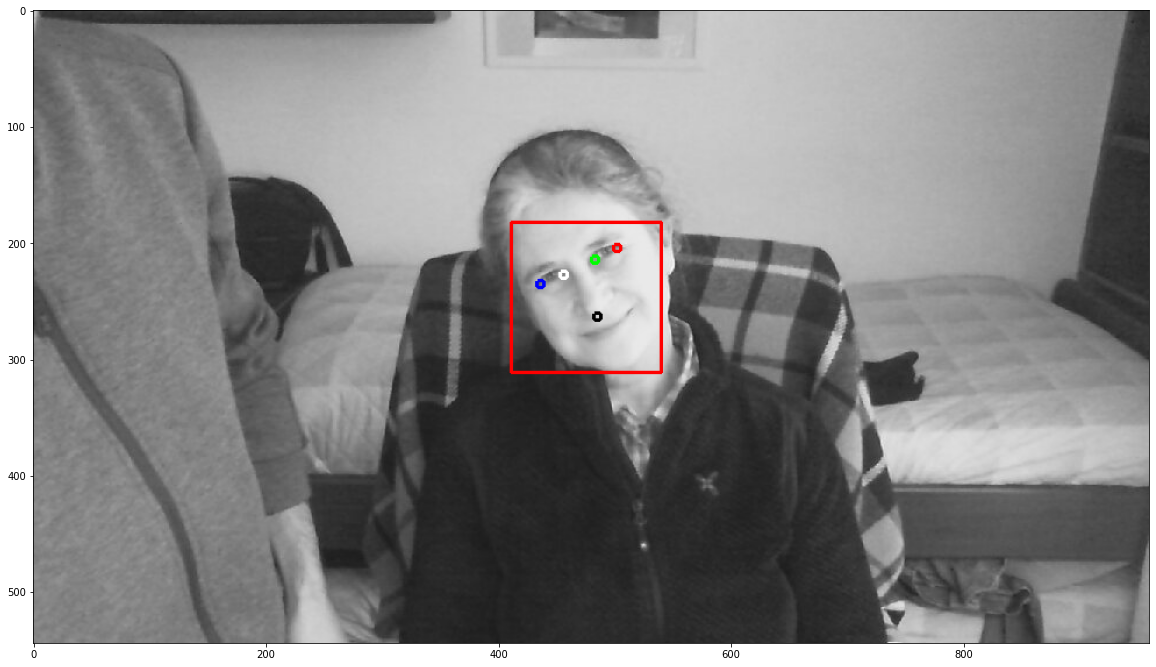

In [2]:
from face_recognition_cam.util import find_faces, rotate_on_face

# detect a face, align it according to measures
face = find_faces(sample, landmarks=True)[0]
sample_toshow = cv2.cvtColor(sample, cv2.COLOR_GRAY2RGB)

# draw rectangle and eye landmarks
(top, left), (bottom, right) = face['rectangle']
cv2.rectangle(
    sample_toshow,
    (top, left),
    (bottom, right),
    (255,0,0),
    2
)

colors = {
    0: (255, 0, 0),
    1: (0, 255, 0),
    2: (0, 0, 255),
    3: (255, 255, 255),
    4: (0, 0, 0)
}
for i, landmark in enumerate(face['landmarks']):
    cv2.circle(sample_toshow, tuple(landmark), 3, colors[i], 2)

plt.figure(figsize=(20, 20))
plt.imshow(sample_toshow)
plt.show()

(544, 960, 3)
(544, 960, 3)


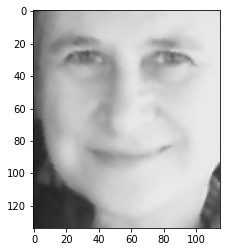

In [3]:
sample_ = cv2.cvtColor(sample, cv2.COLOR_GRAY2RGB)
face_, landmarks_, ((x1, y1), (x2, y2)) = rotate_on_face(sample_, face['landmarks'])
plt.imshow(face_[y1:y2, x1:x2], cmap='gray')